#### 바이앤홀드 전략
---
- 주식을 매수한 후 장기 보유하는 투자전략

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

# 데이터 불러오기
df = fdr.DataReader('AMZN', '2022')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,3408.09,3351.00,3414.07,3323.21,3130000.0,0.0221
2022-01-04,3350.44,3408.76,3428.00,3326.99,3430000.0,-0.0169
2022-01-05,3287.14,3337.66,3342.52,3287.14,3190000.0,-0.0189
2022-01-06,3265.08,3269.01,3296.00,3238.74,2420000.0,-0.0067
2022-01-07,3251.08,3276.78,3304.86,3240.62,2330000.0,-0.0043


In [2]:
# 결측치 확인
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Close,Open,High,Low,Volume,Change
Date,,,,,,


<AxesSubplot:xlabel='Date'>

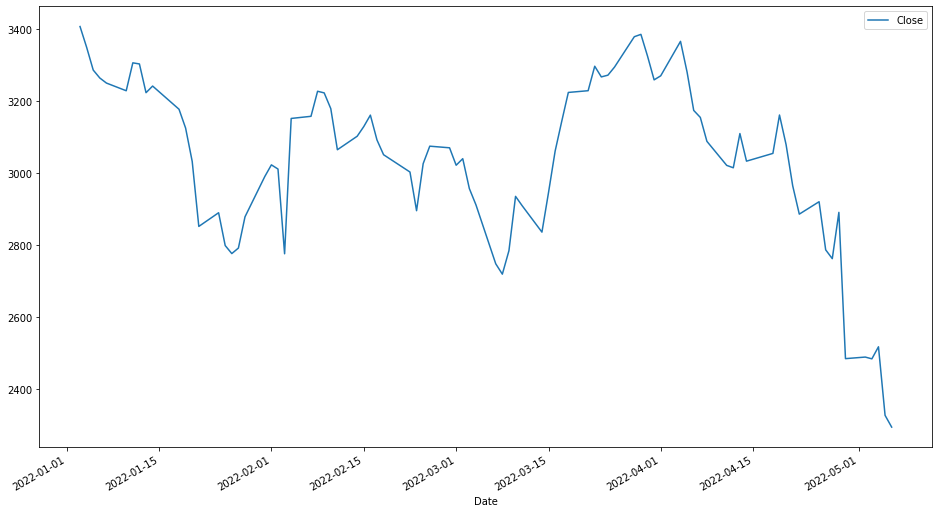

In [3]:
# 데이터 슬라이싱
price_df = df.loc[:,['Close']].copy()
price_df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Date'>

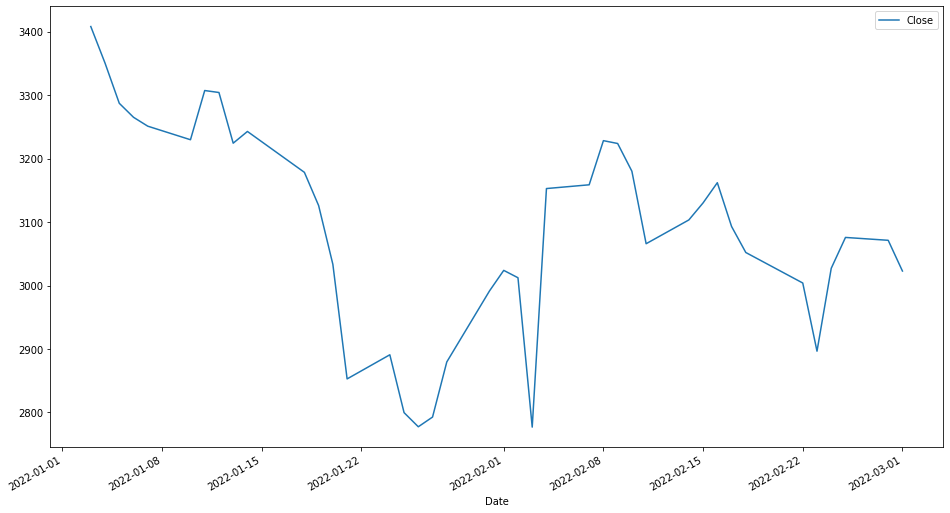

In [5]:
# 데이터 슬라이싱2
from_date = '2022-01-01'
to_date = '2022-03-01'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [6]:
# 일별 수익률 계산
price_df['daily_rtn'] = price_df['Close'].pct_change()
price_df.head(10)

,Close,daily_rtn
Date,,
2022-01-03,3408.09,NaN
2022-01-04,3350.44,-0.016916
2022-01-05,3287.14,-0.018893
2022-01-06,3265.08,-0.006711
2022-01-07,3251.08,-0.004288
2022-01-10,3229.72,-0.006570
2022-01-11,3307.24,0.024002
2022-01-12,3304.14,-0.000937
2022-01-13,3224.28,-0.024170


In [7]:
# 누적곱 : cumprod()
price_df['st_rtn'] = (1 + price_df['daily_rtn']).cumprod()
price_df

,Close,daily_rtn,st_rtn
Date,,,
2022-01-03,3408.09,NaN,NaN
2022-01-04,3350.44,-0.016916,0.983084
2022-01-05,3287.14,-0.018893,0.964511
2022-01-06,3265.08,-0.006711,0.958038
2022-01-07,3251.08,-0.004288,0.953930
...,...,...,...
2022-05-02,2490.00,0.001758,0.730615
2022-05-03,2485.07,-0.001980,0.729168
2022-05-04,2518.57,0.013481,0.738998


<AxesSubplot:xlabel='Date'>

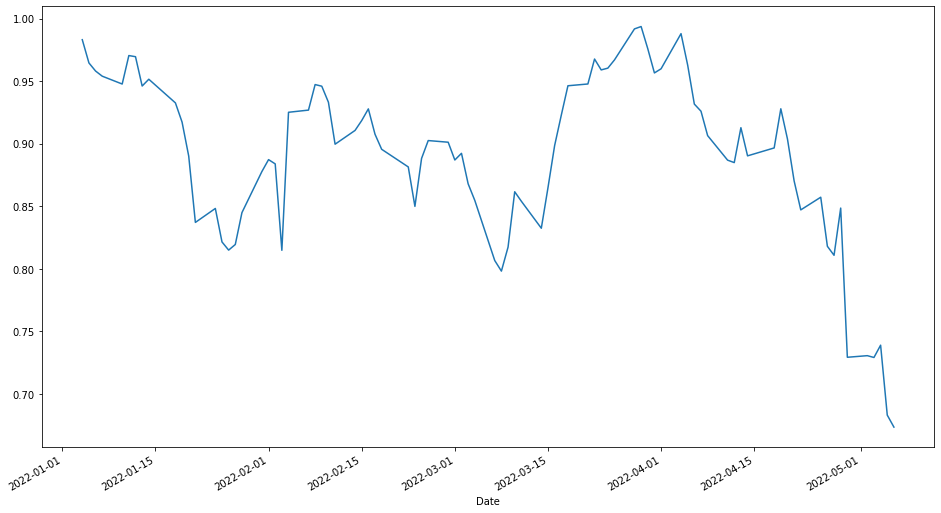

In [8]:
price_df['st_rtn'].plot(figsize=(16,9))

누적 수익:  0.6851189694487887


<AxesSubplot:xlabel='Date'>

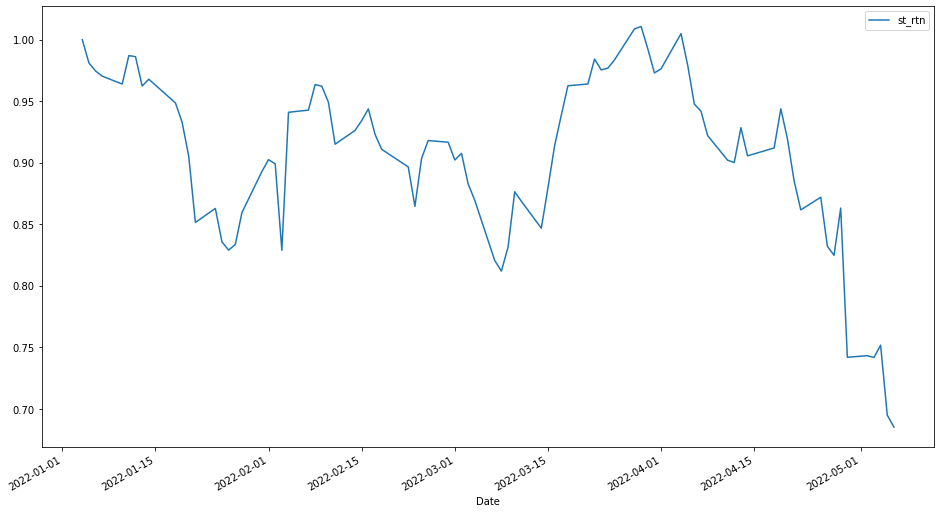

In [9]:
base_date = '2022-01-04'
tmp_df = price_df.loc[base_date:,['st_rtn']] / price_df.loc[base_date,['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익: ', tmp_df.loc[last_date, 'st_rtn'])
tmp_df.plot(figsize=(16,9))

#### 바이앤홀드 전략
---
- 투자 성과 분석 지표
    - 연평균 복리 수익률(CAGR)
    - 최대 낙폭(MDD)
    - 변동성(Vol)
    - 샤프 지수(Sharpe ratio)

In [10]:
# 연평균 복리 수익률

CAGR = price_df.loc['2022-05-06', 'st_rtn'] ** (252./len(price_df.index)) -1
CAGR

-0.6817073999383154

<AxesSubplot:xlabel='Date'>

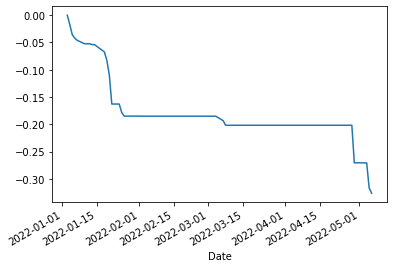

In [11]:
# 최대 낙폭 = (Trough Value - Peak Value) / Peak Value
# cummax : 누적 최댓값 반환
# cummin : 최대 하락률 계산

historicla_max = price_df['Close'].cummax()
daily_drawdown = price_df['Close'] / historicla_max - 1.0
historicla_dd = daily_drawdown.cummin()
historicla_dd.plot()

In [12]:
# 변동성
# 루이 바슐리에의 '투기이론' : 주가의 변동폭은 시간의 제곱근에 비례

VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL

0.5283450600254076

In [13]:
# 샤프 지수 : 위험 대비 수익성 지표

Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
Sharpe

-1.9201548656810834

In [14]:
# 성과 분석 결과

CAGR = price_df.loc['2022-05-06', 'st_rtn'] ** (252./len(price_df.index)) -1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historicla_dd.min()

print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(Sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')


CAGR :  -68.17 %
Sharpe :  -1.92
VOL :  52.83 %
MDD :  32.65 %
